<a href="https://colab.research.google.com/github/Triveniinturi/First-Project/blob/main/AiFoodApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Oct 22 12:04:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             56W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="e66HMh7BHgVY4KnP7TOa")
project = rf.workspace("fooddetectionyolov8-bhli3").project("indianfoodnet-c0mxe")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 117.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to IndianFoodNet-1 in yolov8:: 100%|██████████| 10904/10904 [00:02<00:00, 4712.67it/s]


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 40.7/235.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!yolo mode=train model=yolov8m.pt data=/content/IndianFoodNet-1/data.yaml epochs=150 imgsz=640

100% 49.7M/49.7M [00:01<00:00, 46.0MB/s]
New https://pypi.org/project/ultralytics/8.3.219 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/IndianFoodNet-1/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/Colab Notebooks/AiFoodDetection
!mkdir Food-Calorie-Recommender-app
%cd Food-Calorie-Recommender-app

!mkdir yolov8
%cd yolov8
!touch best.pt
!touch data.yaml
!mkdir -p train/valid/images
%cd ..

!mkdir app
%cd app
!touch app.py
!touch calories_data.py
!touch requirements.txt
!touch utils.py
%cd ..

!touch README.md
!touch setup_instructions.txt

/content/drive/MyDrive/Colab Notebooks/AiFoodDetection
/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app
/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/yolov8
/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app
/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/app
/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app


In [11]:
# If trained YOLOv8 model was saved automatically
!cp /content/runs/detect/train/weights/best.pt "/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/yolov8/best.pt"

In [16]:
# ✅ Clean install without pyngrok/localtunnel
!pip install ultralytics streamlit pillow pandas numpy requests matplotlib cloudflared -q


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 143.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 5.8 MB/s eta 0:00:00


In [17]:
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!sudo dpkg -i cloudflared-linux-amd64.deb


(Reading database ... 126679 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.10.0) over (2025.10.0) ...
Setting up cloudflared (2025.10.0) ...
Processing triggers for man-db (2.10.2-1) ...


In [18]:
!cloudflared --version


cloudflared version 2025.10.0 (built 2025-10-14-19:01 UTC)


In [19]:
# 4️⃣ Create the Streamlit app file
%%writefile "/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/app/app.py"
import streamlit as st
from ultralytics import YOLO
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Calorie Data ----------
calories_per_100g = {
    "AlooMasala": 100, "Bhatura": 355, "BhindiMasala": 107, "Biryani": 170,
    "Chai": 50, "Chole": 148, "CoconutChutney": 402, "Dal": 116,
    "Dosa": 150, "DumAloo": 170, "FishCurry": 124, "Ghevar": 700,
    "GreenChutney": 175, "GulabJamun": 370, "Idli": 90, "Jalebi": 356,
    "Kebab": 250, "Kheer": 120, "Kulfi": 224, "Lassi": 80,
    "MuttonCurry": 120, "OnionPakoda": 464, "PalakPaneer": 169,
    "Poha": 130, "RajmaCurry": 130, "RasMalai": 120, "Samosa": 362,
    "ShahiPaneer": 175, "WhiteRice": 111
}

# default serving grams for each dish
default_serving_grams = {k: 150 for k in calories_per_100g.keys()}
default_serving_grams.update({
    "Bhatura": 100, "Chai": 200, "Idli": 50, "Lassi": 200, "CoconutChutney": 30
})

# healthier replacements
healthy_replacements = {
    "AlooMasala": ["Mixed Vegetable Curry", "Steamed Potato with Herbs"],
    "Bhatura": ["Whole-Wheat Chapati", "Baked Bhatura"],
    "Biryani": ["Vegetable Pulao with Brown Rice", "Quinoa Biryani"],
    "Chole": ["Boiled Chickpea Salad", "Lite Chole (low oil)"],
    "Samosa": ["Baked Samosa", "Veggie Spring Roll (air-fried)"],
    "ShahiPaneer": ["Paneer Tikka", "Palak Paneer (low-fat)"],
    "GulabJamun": ["Dry Fruit Ladoo", "Yogurt + Honey Dessert"],
    "MuttonCurry": ["Grilled Chicken Tikka", "Fish Curry (tomato base)"],
    "WhiteRice": ["Brown Rice", "Quinoa"],
    "Dal": ["Mixed Dal + Vegetables", "Sprouted Moong Dal"],
}

# ---------- Helper Functions ----------
def estimate_calories(label, grams=100):
    kcal_100 = calories_per_100g.get(label, 150)
    return kcal_100 * grams / 100

def compute_health_score(label):
    kcal_100 = calories_per_100g.get(label, 150)
    score = 50
    if kcal_100 >= 400: score -= 25
    elif kcal_100 >= 300: score -= 15
    elif kcal_100 >= 200: score -= 5
    if label in ["Dal", "Chole", "Poha", "Idli", "Dosa", "RajmaCurry"]: score += 15
    if label in ["Samosa", "Bhatura", "GulabJamun", "OnionPakoda"]: score -= 20
    return max(0, min(100, score))

# ---------- Streamlit UI ----------
st.set_page_config(layout="wide", page_title="Food Calorie Recommender")
st.title("🍱 Indian Food Calorie Estimator & Healthy Recommender")

uploaded = st.file_uploader("Upload a food image", type=["jpg", "jpeg", "png"])
weights_path = "/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/yolov8/best.pt"

if uploaded:
    image = Image.open(uploaded).convert("RGB")
    st.image(image, caption="Uploaded Image", use_container_width=True)

    model = YOLO(weights_path)
    with st.spinner("Detecting food items..."):
        results = model.predict(source=np.array(image), imgsz=640, conf=0.1, verbose=False)
    res = results[0]
    boxes = res.boxes
    names = model.names
    detections = []

    if len(boxes) == 0:
        st.warning("No food items detected.")
    else:
        for box in boxes:
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            label = names.get(cls, str(cls))
            kcal = estimate_calories(label, default_serving_grams.get(label, 100))
            detections.append({
                "Label": label, "Confidence": round(conf,2),
                "Calories": round(kcal,1),
                "Health Score": compute_health_score(label)
            })

        df = pd.DataFrame(detections)
        total = df["Calories"].sum()
        st.subheader("🍽️ Detected Foods")
        st.dataframe(df)
        st.metric("Estimated Total Calories", f"{total:.0f} kcal")

        # Display bounding boxes
        fig, ax = plt.subplots(figsize=(6,6))
        ax.imshow(image)
        for d, box in zip(detections, boxes):
            coords = box.xyxy[0]
            if coords.is_cuda:
              coords = coords.cpu()
            x1, y1, x2, y2 = coords.numpy()
            rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1-5, f"{d['Label']} ({d['Calories']:.0f} kcal)", color='yellow', fontsize=9, weight='bold',
                    bbox=dict(facecolor='black', alpha=0.5, pad=1))
        ax.axis("off")
        st.pyplot(fig)

        # Health recommendations
        st.header("💡 Healthier Alternatives")
        for d in detections:
            label = d["Label"]
            recs = healthy_replacements.get(label, [])
            st.subheader(f"{label} → {', '.join(recs) if recs else 'No alternatives listed'}")
            st.write(f"Health Score: {d['Health Score']}/100")


Overwriting /content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/app/app.py


In [20]:
import subprocess, threading, time

app_path = "/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/app/app.py"

def run_streamlit():
    # Wrap the path in quotes to handle spaces
    subprocess.call(["streamlit", "run", app_path, "--server.port", "8501"])

thread = threading.Thread(target=run_streamlit)
thread.start()

time.sleep(8)  # wait for Streamlit to initialize

print("🚀 Starting Cloudflare tunnel... (wait for public URL below)")
# Expose app via Cloudflare tunnel (works on Python 3.12)
!cloudflared tunnel --url http://localhost:8501 --no-autoupdate

🚀 Starting Cloudflare tunnel... (wait for public URL below)
2025-10-22T13:54:18Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-10-22T13:54:18Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-10-22T13:54:22Z INF +--------------------------------------------------------------------------------------------+
2025-10-22T13:54:22Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-10-22T13:54:22Z 

In [23]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/yolov8/best.pt")
print(model.names)

{0: 'AlooGobi', 1: 'AlooMasala', 2: 'Bhatura', 3: 'BhindiMasala', 4: 'Biryani', 5: 'Chai', 6: 'Chole', 7: 'CoconutChutney', 8: 'Dal', 9: 'Dosa', 10: 'DumAloo', 11: 'FishCurry', 12: 'Ghevar', 13: 'GreenChutney', 14: 'GulabJamun', 15: 'Idli', 16: 'Jalebi', 17: 'Kebab', 18: 'Kheer', 19: 'Kulfi', 20: 'Lassi', 21: 'MuttonCurry', 22: 'OnionPakoda', 23: 'PalakPaneer', 24: 'Poha', 25: 'RajmaCurry', 26: 'RasMalai', 27: 'Samosa', 28: 'ShahiPaneer', 29: 'WhiteRice'}


In [24]:
#!mkdir test_output
!yolo predict model="/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/yolov8/best.pt" source="/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/MalaiKulfi2.jpg" save=True conf=0.25


Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 218 layers, 25,857,130 parameters, 0 gradients, 78.8 GFLOPs

image 1/1 /content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/MalaiKulfi2.jpg: 640x480 4 Kulfis, 71.6ms
Speed: 6.4ms preprocess, 71.6ms inference, 82.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


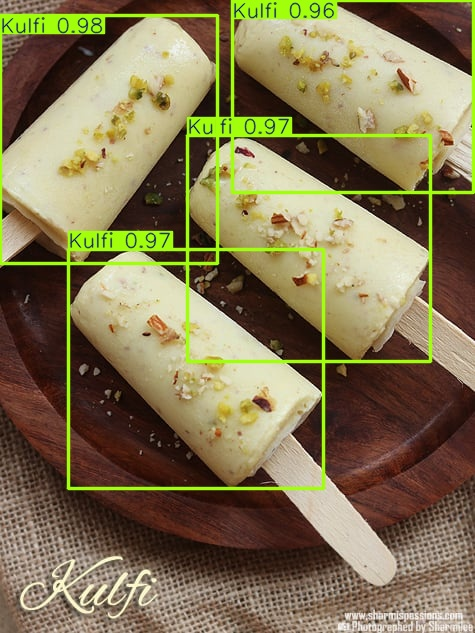

In [25]:
from PIL import Image
Image.open("/content/drive/MyDrive/Colab Notebooks/AiFoodDetection/Food-Calorie-Recommender-app/runs/detect/predict/MalaiKulfi2.jpg")
